In [1]:
import bs4
import pandas as pd
import requests
import os
import pickle
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
os.chdir("/content/gdrive/My Drive/BKDN/Đồ Án/Fashion_MLP")

In [4]:
def get_page_content(url):
   page = requests.get(url)
   return bs4.BeautifulSoup(page.content,"html.parser")

# List link categories

In [5]:
url = 'https://www.zanado.com/' # các bạn thay link của trang mình cần lấy dữ liệu tại đây
soup = get_page_content(url)
cate_div = soup.find_all('div', class_="block")
cate_div0 = cate_div[0]
cate_div1 = cate_div[1]
list_a0 = cate_div0.find_all('a')
list_a1 = cate_div1.find_all('a')

In [6]:
list_a = list_a0 + list_a1

In [7]:
removeItem = ["THỜI TRANG NAM","Quần Áo Nam","Áo Nam","Giày Dép Nam","Đồng Hồ Nam","Túi Xách - Bóp Ví Nam","Phụ Kiện Nam",
              "THỜI TRANG NỮ","Váy Đầm Nữ","Quần Áo Nữ","Đồng Hồ Nữ","Giày Dép Nữ","Túi Xách - Bóp Ví Nữ",
              "Đồ Trang Sức Nữ","Phụ Kiện Nữ","Quần Nam","Quần Lót Nam","Giày Nam","Váy","Đầm",
              "Áo Nữ","Quần Nữ","Bộ Đồ Nữ","Đồ Lót Nữ","Giày Nữ","Phụ Kiện Nam Khác","Phụ Kiện Nữ Khác"]

In [8]:
list_anew = []
for item in list_a:
  text = item.getText()
  if(text not in removeItem):
    list_anew.append(item)

In [9]:
categories = [cate.getText() for cate in list_anew]
cateIds = list(range(len(categories)))

In [ ]:
# cateIds = list(range(len(categories)))
# df = pd.DataFrame({'id': cateIds, 'name': categories})
# df

In [ ]:
# df.to_csv('data/categories.csv', index = False)

# Tạo dữ liệu tất cả product

In [10]:
def getProductsWithCate(cate_link):
  soup = get_page_content(cate_link)
  d_page = soup.find('div', class_="pager")
  numpages=2
  if(d_page):
    numpages = len(d_page.find_all('li'))
    if(numpages>3): 
      numpages = 3      
  d_link = [cate_link+"?p="+str(index) for index in range(1,numpages)]

  names = []
  links = []
  images_src = []
  list_price = []
  list_priceold = []
  list_discount = []
  for link in d_link:
    print('Links to scan: ')
    print(link)
    soup = get_page_content(link)
    product_div = soup.find('ul', class_="products-grid")
    list_li = product_div.find_all('li')
    list_price +=[item.getText()  for item in product_div.find_all('span',class_="pricespecial")] 
    list_priceold +=[item.getText()  for item in product_div.find_all('span',class_="priceold")] 
    for li in list_li:
      a = li.find('a')
      names.append(a['title']) 
      links.append(a['href'])
      images_src.append(a.img['src'])
      dis = li.find('div',class_="discountpercent")
      value_dis = '0%'
      if(dis):
        value_dis = dis.getText()
      list_discount.append(value_dis)
    # print("len names: ",len(names))
    # print("len dis: ",len(list_discount))

  return names, links, images_src, list_price, list_priceold, list_discount

In [11]:
link_arr =[]
base_link = 'https://www.zanado.com'
for item in list_anew:
    link_arr.append(base_link+item['href'])

In [12]:
all_names = []
all_links = []
all_images = []
products_cates = []
all_prices = []
all_priceold = []
all_discount = []
i=0
for cate_link in link_arr:
  print('i = ',i)
  names, links, images_src, list_price, list_priceold, list_discount = getProductsWithCate(cate_link)
  all_names += names
  all_links += links
  all_images += images_src
  all_prices += list_price
  all_priceold += list_priceold
  all_discount += list_discount
  new_cates = [categories[i]]*len(names)
  products_cates += new_cates
  # print("len all names: ",len(all_names))
  # print("len all dis: ",len(all_discount))
  # if(len(all_names)!=len(all_discount)):
  #   print('loi....')
  #   break
  # print('done!')
  i=i+1

i =  0
Links to scan: 
https://www.zanado.com/ao-khoac-nam-51.html?p=1
Links to scan: 
https://www.zanado.com/ao-khoac-nam-51.html?p=2
i =  1
Links to scan: 
https://www.zanado.com/ao-so-mi-nam-49.html?p=1
Links to scan: 
https://www.zanado.com/ao-so-mi-nam-49.html?p=2
i =  2
Links to scan: 
https://www.zanado.com/ao-thun-nam-50.html?p=1
Links to scan: 
https://www.zanado.com/ao-thun-nam-50.html?p=2
i =  3
Links to scan: 
https://www.zanado.com/quan-tay-nam-39.html?p=1
Links to scan: 
https://www.zanado.com/quan-tay-nam-39.html?p=2
i =  4
Links to scan: 
https://www.zanado.com/quan-short-quan-lung-nam-41.html?p=1
Links to scan: 
https://www.zanado.com/quan-short-quan-lung-nam-41.html?p=2
i =  5
Links to scan: 
https://www.zanado.com/quan-jean-nam-247.html?p=1
Links to scan: 
https://www.zanado.com/quan-jean-nam-247.html?p=2
i =  6
Links to scan: 
https://www.zanado.com/quan-kieu-nam-248.html?p=1
Links to scan: 
https://www.zanado.com/quan-kieu-nam-248.html?p=2
i =  7
Links to scan: 
ht

In [13]:
productIds = list(range(len(all_names)))
df_products = pd.DataFrame({'product_id': productIds, 'name': all_names, 'link': all_links, 'image': all_images, 'priceold': all_priceold,
                            'price':all_prices, 'discount':all_discount, 'category': products_cates})
df_products

,product_id,name,link,image,priceold,price,discount,category
0,0,Áo cardigan nam phong cách hàn quốc - Xanh đen,/ao-cardigan-nam-phong-cach-han-quoc-dep-gia-r...,//img.zanado.com/media/catalog/product/cache/a...,430.000 ₫,299.000 ₫,30%,Áo Khoác Nam
1,1,Áo khoác Kaki Pilot Landing trẻ trung - Đen,/ao-khoac-kaki-pilot-landing-tre-trung-dep-gia...,//img.zanado.com/media/catalog/product/cache/a...,239.000 ₫,165.000 ₫,31%,Áo Khoác Nam
2,2,Áo khoác kaki nam nữ đại bàng cá tính - Trắng,/ao-khoac-kaki-nam-nu-dai-bang-ca-tinh-dep-gia...,//img.zanado.com/media/catalog/product/cache/a...,345.000 ₫,245.000 ₫,29%,Áo Khoác Nam
3,3,Áo khoác unisex phối chữ cá tính - Xanh đen,/ao-khoac-unisex-phoi-chu-ca-tinh-dep-gia-re-g...,//img.zanado.com/media/catalog/product/cache/a...,270.000 ₫,179.000 ₫,34%,Áo Khoác Nam
4,4,Áo khoác dù nam nữ cá tính - Xanh lá,/ao-khoac-du-nam-nu-ca-tinh-dep-gia-re-giam-33...,//img.zanado.com/media/catalog/product/cache/a...,350.000 ₫,235.000 ₫,33%,Áo Khoác Nam
...,...,...,...,...,...,...,...,...
5791,5791,Combo 5 đôi vớ nữ phối sọc dễ thương - Hồng,/combo-5-doi-vo-nu-phoi-soc-de-thuong-dep-gia-...,//img.zanado.com/media/catalog/product/cache/a...,220.000 ₫,135.000 ₫,39%,Tất - Vớ Nữ
5792,5792,Combo 4 đôi vớ nam nữ phối viền,/combo-4-doi-vo-nam-nu-phoi-vien-dep-gia-re-gi...,//img.zanado.com/media/catalog/product/cache/a...,200.000 ₫,115.000 ₫,43%,Tất - Vớ Nữ
5793,5793,Combo 3 quần tất thời trang,/combo-3-quan-tat-thoi-trang-re-dep-giam-38-si...,//img.zanado.com/media/catalog/product/cache/a...,160.000 ₫,99.000 ₫,38%,Tất - Vớ Nữ
5794,5794,Combo 5 đôi vớ nữ cổ ngắn Starts,/combo-5-doi-vo-nu-co-ngan-starts-dep-gia-re-g...,//img.zanado.com/media/catalog/product/cache/a...,223.000 ₫,127.000 ₫,43%,Tất - Vớ Nữ


In [14]:
df_products = df_products.drop(['product_id'], axis=1)
df_products = df_products.drop_duplicates(subset=['name'])
df_products = df_products.reset_index()
df_products = df_products.drop(['index'], axis=1)
df_products = df_products.reset_index()
df_products= df_products.rename(columns={"index": "product_id"})
df_products

,product_id,name,link,image,priceold,price,discount,category
0,0,Áo cardigan nam phong cách hàn quốc - Xanh đen,/ao-cardigan-nam-phong-cach-han-quoc-dep-gia-r...,//img.zanado.com/media/catalog/product/cache/a...,430.000 ₫,299.000 ₫,30%,Áo Khoác Nam
1,1,Áo khoác Kaki Pilot Landing trẻ trung - Đen,/ao-khoac-kaki-pilot-landing-tre-trung-dep-gia...,//img.zanado.com/media/catalog/product/cache/a...,239.000 ₫,165.000 ₫,31%,Áo Khoác Nam
2,2,Áo khoác kaki nam nữ đại bàng cá tính - Trắng,/ao-khoac-kaki-nam-nu-dai-bang-ca-tinh-dep-gia...,//img.zanado.com/media/catalog/product/cache/a...,345.000 ₫,245.000 ₫,29%,Áo Khoác Nam
3,3,Áo khoác unisex phối chữ cá tính - Xanh đen,/ao-khoac-unisex-phoi-chu-ca-tinh-dep-gia-re-g...,//img.zanado.com/media/catalog/product/cache/a...,270.000 ₫,179.000 ₫,34%,Áo Khoác Nam
4,4,Áo khoác dù nam nữ cá tính - Xanh lá,/ao-khoac-du-nam-nu-ca-tinh-dep-gia-re-giam-33...,//img.zanado.com/media/catalog/product/cache/a...,350.000 ₫,235.000 ₫,33%,Áo Khoác Nam
...,...,...,...,...,...,...,...,...
5088,5088,Quần tất nữ siêu co giãn phong cách - Đen,/quan-tat-nu-sieu-co-gian-phong-cach-dep-gia-r...,//img.zanado.com/media/catalog/product/cache/a...,224.000 ₫,149.000 ₫,33%,Tất - Vớ Nữ
5089,5089,Quần vớ đạp gót nữ thời trang - Xám,/quan-vo-dap-got-nu-thoi-trang-dep-gia-re-giam...,//img.zanado.com/media/catalog/product/cache/a...,209.000 ₫,115.000 ₫,45%,Tất - Vớ Nữ
5090,5090,Combo 3 quần tất thời trang,/combo-3-quan-tat-thoi-trang-re-dep-giam-38-si...,//img.zanado.com/media/catalog/product/cache/a...,160.000 ₫,99.000 ₫,38%,Tất - Vớ Nữ
5091,5091,Combo 5 đôi vớ nữ cổ ngắn Starts,/combo-5-doi-vo-nu-co-ngan-starts-dep-gia-re-g...,//img.zanado.com/media/catalog/product/cache/a...,223.000 ₫,127.000 ₫,43%,Tất - Vớ Nữ


In [15]:
df_products.to_csv('data/products.csv', index = False) 

In [ ]:
# df_products  = pd.read_csv('data/products.csv')
# df_products

Text(0, 0.5, 'Thể loại')

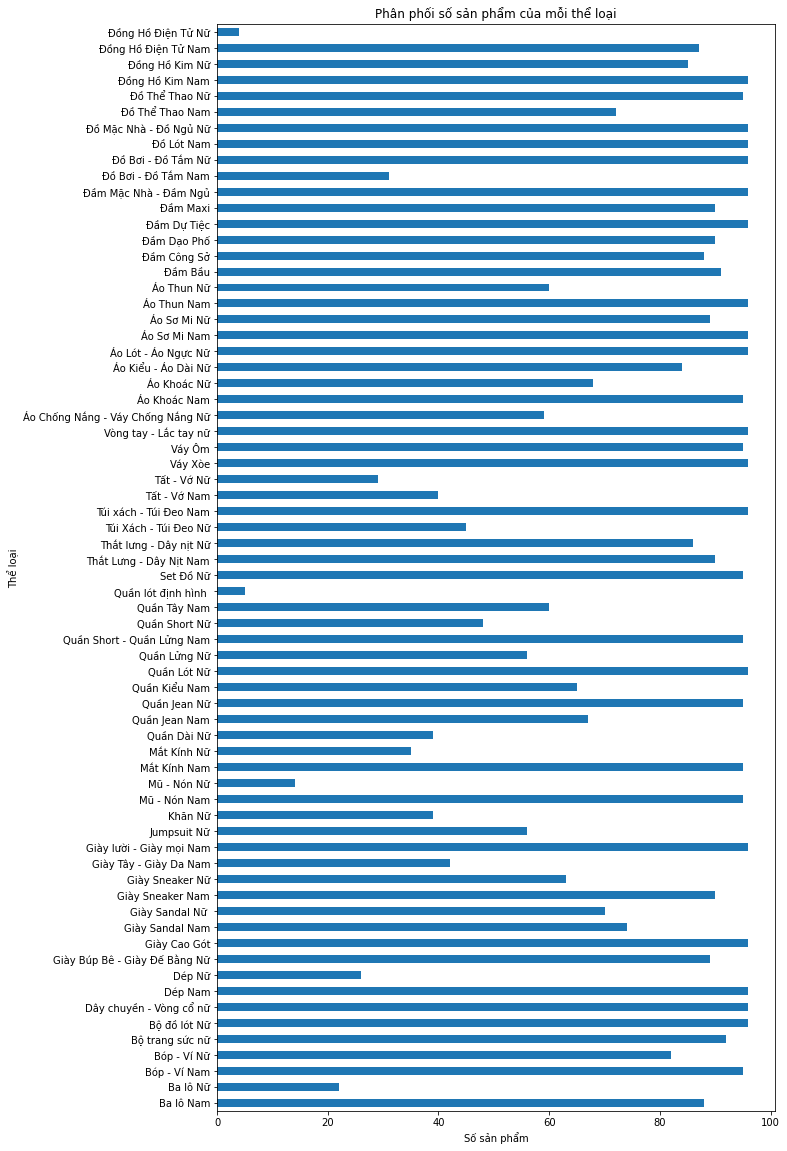

In [ ]:
import matplotlib.pyplot as plt
df_products.groupby('category').product_id.count().plot.barh(figsize=(10, 20))
plt.title('Phân phối số sản phẩm của mỗi thể loại')
plt.xlabel('Số sản phẩm')
plt.ylabel('Thể loại')

# Color column

In [ ]:
df_products  = pd.read_csv('data/products.csv')
df_products

,product_id,name,link,image,priceold,price,discount,category
0,0,Áo khoác dù nam nữ cá tính - Xanh lá,/ao-khoac-du-nam-nu-ca-tinh-dep-gia-re-giam-33...,//img.zanado.com/media/catalog/product/cache/a...,350.000 ₫,235.000 ₫,33%,Áo Khoác Nam
1,1,Áo khoác nam nữ AW phong cách - Đỏ đô,/ao-khoac-nam-nu-aw-phong-cach-dep-gia-re-giam...,//img.zanado.com/media/catalog/product/cache/a...,239.000 ₫,165.000 ₫,31%,Áo Khoác Nam
2,2,Áo khoác dù nam nữ phong cách - Đen,/ao-khoac-du-nam-nu-phong-cach-dep-gia-re-giam...,//img.zanado.com/media/catalog/product/cache/a...,310.000 ₫,209.000 ₫,33%,Áo Khoác Nam
3,3,Áo khoác nam nữ AW phong cách - Xanh rêu,/ao-khoac-nam-nu-aw-phong-cach-dep-gia-re-giam...,//img.zanado.com/media/catalog/product/cache/a...,239.000 ₫,165.000 ₫,31%,Áo Khoác Nam
4,4,Áo khoác Bomber Nam Nữ cá tính - Đen,/ao-khoac-bomber-nam-nu-ca-tinh-dep-gia-re-gia...,//img.zanado.com/media/catalog/product/cache/a...,239.000 ₫,160.000 ₫,33%,Áo Khoác Nam
...,...,...,...,...,...,...,...,...
5088,5088,Combo 2 vớ quần nữ lưới quyến rũ 1380 - Đen,/combo-2-vo-quan-nu-luoi-quyen-ru-1380-dep-gia...,//img.zanado.com/media/catalog/product/cache/a...,230.000 ₫,160.000 ₫,30%,Tất - Vớ Nữ
5089,5089,Combo 3 đôi vớ nữ chống nắng thân dài - Da,/combo-3-doi-vo-nu-chong-nang-than-dai-dep-gia...,//img.zanado.com/media/catalog/product/cache/a...,220.000 ₫,149.000 ₫,32%,Tất - Vớ Nữ
5090,5090,Combo 2 vớ quần nữ lưới sành điệu 1460 - Da,/combo-2-vo-quan-nu-luoi-sanh-dieu-1460-dep-gi...,//img.zanado.com/media/catalog/product/cache/a...,235.000 ₫,160.000 ₫,32%,Tất - Vớ Nữ
5091,5091,Combo 3 quần tất thời trang,/combo-3-quan-tat-thoi-trang-re-dep-giam-38-si...,//img.zanado.com/media/catalog/product/cache/a...,160.000 ₫,99.000 ₫,38%,Tất - Vớ Nữ


In [ ]:
from PIL import Image
import requests
from io import BytesIO

response = requests.get(url)
img = Image.open(BytesIO(response.content))

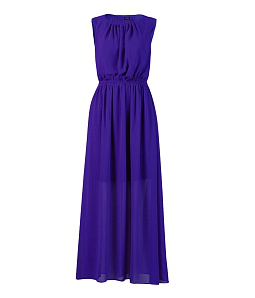

In [ ]:
img

In [ ]:
width, height = img.size
print((width,height))

(255, 298)


In [ ]:
colors = img.getpixel((int(height/2),int(width/2)))
colors

(49, 24, 126)

In [ ]:
import colorsys
myColor = colorsys.rgb_to_hls(colors[0],colors[1],colors[2])

In [ ]:
r, g, b = colors
r, g, b = [x/255.0 for x in colors]
h, l, s = colorsys.rgb_to_hls(r, g, b)
print(h, l, s)

0.7075163398692811 0.29411764705882354 0.68


In [ ]:
myColor = (h, l, s )

In [ ]:
def Classify(myColor):
  hue = myColor[0]
  lgt = myColor[1]
  sat = myColor[2]
  

  if (lgt < 0.2):  return "Blacks";
  if (lgt > 0.8):  return "Whites";

  if (sat < 0.25): return "Grays";

  if (hue < 30):   return "Reds";
  if (hue < 90):   return "Yellows";
  if (hue < 150):  return "Greens";
  if (hue < 210):  return "Cyans";
  if (hue < 270):  return "Blues";
  if (hue < 330):  return "Magentas";
  return "Reds";

In [ ]:
Classify(myColor)

'Reds'